In [1]:
!nvidia-smi

Sat Sep 21 05:51:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A10G                    On  | 00000000:00:1E.0 Off |                    0 |
|  0%   26C    P8               9W / 300W |      0MiB / 23028MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install torchao --extra-index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.6 MB/s eta 0:00:0000:01


In [3]:
!pip install openai
!pip install langchain-community langchain-core
!pip install transformers[sentencepiece]
!pip install diffusers
!pip install accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.6/375.6 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 38.8 MB/s eta 0:00:00
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 5.3 MB/s eta 0:00:00:00:01
Using cached packaging-24.1-py3-none-any.whl (53 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 23.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-

In [4]:
!pip install git+https://github.com/xhinker/sd_embed.git@main

  Cloning https://github.com/xhinker/sd_embed.git (to revision main) to /tmp/pip-req-build-m80jdoys
  Running command git clone --filter=blob:none --quiet https://github.com/xhinker/sd_embed.git /tmp/pip-req-build-m80jdoys
  Resolved https://github.com/xhinker/sd_embed.git to commit 168dda0b883e196061022d50012defddf9c5b4dd
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 817.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.7/109.7 kB 1.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 3.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 23.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 27.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 4.8 MB/s eta 0:00:00ta 0:00:01
  Created wheel for sd_embed: filename=sd_embed-1.240829.1-py3-none-any.whl size=18942 sha256=966343c8169582

In [5]:
from diffusers import DiffusionPipeline, FluxTransformer2DModel
from torchao.quantization import quantize_, int8_weight_only
import torch
from sd_embed.embedding_funcs import get_weighted_text_embeddings_flux1

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/diffusers/schedulers/scheduling_lms_discrete.py:21: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.22.4)
  from scipy import integrate


In [6]:
from huggingface_hub import notebook_login
notebook_login()
# 

In [7]:
# model_path = "black-forest-labs/FLUX.1-schnell"
model_path = "black-forest-labs/FLUX.1-dev"

transformer = FluxTransformer2DModel.from_pretrained(
    model_path
    , subfolder = "transformer"
    , torch_dtype = torch.bfloat16
)
quantize_(transformer, int8_weight_only())

transformer/config.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/121k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

(…)pytorch_model-00002-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

(…)pytorch_model-00003-of-00003.safetensors:   0%|          | 0.00/3.87G [00:00<?, ?B/s]

(…)pytorch_model-00001-of-00003.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

In [8]:
pipe = DiffusionPipeline.from_pretrained(
    model_path
    , transformer = transformer
    , torch_dtype = torch.bfloat16
)

pipe.enable_model_cpu_offload()

model_index.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

(…)t_encoder_2/model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

tokenizer_2/tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/820 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [9]:
from langchain.prompts.chat import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.chat_history import BaseChatMessageHistory
from pydantic import BaseModel, Field
from typing import List
from openai import OpenAI


from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_core.messages import AIMessage, HumanMessage, BaseMessage

In [20]:
class InMemoryHistory(BaseChatMessageHistory, BaseModel):
    """In-memory implementation of chat message history."""
    messages: List[BaseMessage] = Field(default_factory=list)

    def add_messages(self, messages: List[BaseMessage]) -> None:
        """Add messages to the history."""
        self.messages.extend(messages)

    def clear(self) -> None:
        """Clear the message history."""
        self.messages = []

# Global variable to store chat message history for each session
store = {}

def get_by_session_id(session_id: str) -> BaseChatMessageHistory:
    """Return a chat history for the given session."""
    if session_id not in store:
        store[session_id] = InMemoryHistory()
    return store[session_id]

In [52]:
# Class for the interactive tattoo design process
class TattooDesignerInteractive:
    def __init__(self):
        # List of questions to ask the user during the interactive session
        self.questions = [
            "Let's start with your initial idea. Can you describe your tattoo concept?",
            "Which tattoo style do you prefer? (Blackwork, Black and Grey, Realism)",
            "Where would you like the tattoo to be placed on your body? (e.g., arm, leg, back, etc.)",
            "What size do you envision for your tattoo? (Small, Medium, Large)?",
#             "What is the theme or subject of your tattoo? (e.g., animals, nature, abstract, portrait)",
            "How detailed would you like the tattoo to be? (Minimalistic, Medium detail, Highly detailed)",
            "Would you like to add any personal elements such as initials, dates, or quotes?",
            "Any other details you want to add?"
        ]
        # Initialize the current question index
        self.current_question = 0

    # Method to handle dynamic question flow based on user input
    def dynamic_question_flow(self, session_id, user_input):
        """Dynamically generates questions based on user input."""
        # Retrieve chat history by session ID (placeholder function)
        history = get_by_session_id(session_id)

        # Check if more questions are available to ask
        if self.current_question < len(self.questions):
            # Add user input to the chat history
            history.add_messages(f"{self.questions[self.current_question]}: {user_input}")
            # Move to the next question
            self.current_question += 1

            # Return the next question if there are more, else signal the end
            if self.current_question < len(self.questions):
                return self.questions[self.current_question]
            else:
                return "Thank you! Your tattoo description will be generated shortly."
        else:
            # If no more questions, end the process
            return "Thank you! Your tattoo description will be generated shortly."

    # Method to generate the tattoo design prompt based on collected user answers
    def generate_design_prompt(self, session_id):
        """Generate a detailed tattoo design prompt based on all collected answers."""
        # Placeholder OpenAI API key (replace with a secure key for production)
        OPENAI_API_KEY = "*****"
        # Initialize OpenAI client
        client = OpenAI(api_key=OPENAI_API_KEY)
        # Retrieve chat history for the current session
        history = get_by_session_id(session_id)
        # Collect all user input from the session history
        collected_info = "\n".join(history.messages)
        # Create a prompt template for generating a tattoo design based on user preferences
        
        
        
        prompt_template = f"""
        You are a professional tattoo designer specializing in creating realistic and stylized tattoo designs for permanent ink on human skin. Your goal is to geenrate a tattoo description based on the user's preferences, ensuring the design is suitable for tattooing on skin and aligns with the selected style. 

        - If the user chose Blackwork, the design should reflect classic Blackwork tattoo characteristics: bold, solid black areas with thick outlines, sharp contrasts, and intentional use of negative space or 'skin-breaks'. The design should appear strong and graphic, mimicking the traditional ink on skin.
        - If the user chose Black and Grey, the design should follow Black and Grey tattoo techniques: using only black ink diluted to various shades of grey, with smooth gradients, shading, and subtle transitions to create depth and realism. The design should mimic the appearance of ink shaded on skin, focusing on lifelike details and soft contrasts.
        - If the user chose Realism, the tattoo design should be incredibly detailed and lifelike, with intricate shading and highlights to create a three-dimensional effect. It should look so realistic that it could be mistaken for a photograph. Emphasize complex shading and precise details, especially around key elements.
        - If the user chose Photo-Realism, the tattoo design should be replicating a specific photograph with exacting precision, capturing every fine detail and nuance, from facial expressions to textures, creating an almost mirror-like representation on the skin.
        - If the user chose Hyper-Realism, the tattoo design should take realism to the next level by adding extreme depth and detail, creating an illusion that the image is not only real but three-dimensional, making the subject appear as though it's about to step off the skin.
        - If the user chose Morphed-Realism, the tattoo design should be A fusion of realism and abstract elements, this style combines multiple lifelike images that blend together seamlessly, offering a dreamlike, surreal composition with realistic texture and form.
        - If the user chose Portraiture-Realism, the tattoo design should Portrait realism captures the essence of a person, rendering their likeness with incredible accuracy, down to the smallest features like wrinkles, freckles, and the glint in their eyes, evoking deep emotional connection.
        - If the user chose Black and Grey Realism, the tattoo design should use a range of black and grey inks, this sub-genre emphasizes depth and shadows to bring dramatic contrast to lifelike images, often creating a moody, timeless feel in designs like portraits, animals, or scenes.
        - If the user chose Color Realism, the tattoo design should have vibrant, realistic colors enhancing the depth and dimension of subjects like flowers, animals, or landscapes, making them appear vividly lifelike and visually striking.
        - If the user chose Micro-Realism, The tatoo design focus on creating highly detailed, lifelike images in a miniature scale, often with fine lines and delicate shading, blending realism with subtle, illustrative elements.
 
        - The tattoo should be designed for placement on body part mentioned by the user, meaning it should flow naturally with the contours of the skin in this area. 

        Here are the specific preferences provided by the user: "{collected_info}"

        Create a tattoo design descriptions that fits these preferences, emphasizing the style, precision, and the fact that it will be a permanent, inked design on human skin. Ensure the design considers tattoo artistry techniques like shading, linework, and how the design will appear when applied to skin texture.
        """   
        # Call the OpenAI API to generate a tattoo design description based on the prompt
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "system", "content": prompt_template}],
            max_tokens=500,
        )
        # Return the generated tattoo design description from the API response
        return response.choices[0].message

In [22]:
# Function to simulate the interactive tattoo design process
def interactive_tattoo_design(session_id):
    # Initialize the interactive tattoo designer object
    designer = TattooDesignerInteractive()
    # Retrieve chat history for the session (placeholder function)
    history = get_by_session_id(session_id)

    # Start the interactive session by greeting the user and asking the first question
    print("Let's design your tattoo! Please answer a few questions.")
    print("\nAssistant: ", designer.questions[0])  # Ask the first question

    # Loop to continue asking questions and collecting answers from the user
    while True:
        # Get user input as an answer to the current question
        user_input = input("\nYou: ")
        # Add the user input to the chat history
        history.add_messages(user_input)

        # Dynamically move to the next question based on user input
        next_question = designer.dynamic_question_flow(session_id, user_input)
        # Print the next question to the user
        print("\nAssistant: ", next_question)

        # Break the loop when all questions are answered
        if next_question == "Thank you! Your tattoo description will be generated shortly.":
            break

    # Generate the final detailed tattoo design prompt after all questions are answered
    detailed_prompt = designer.generate_design_prompt(session_id)
    # Print the final tattoo design prompt
    print("\nFinal Tattoo Design Prompt:\n", detailed_prompt)

In [23]:
session_id = "user-session-11"
interactive_tattoo_design(session_id)

Let's design your tattoo! Please answer a few questions.

Assistant:  Let's start with your initial idea. Can you describe your tattoo concept?

You: phoenix bird 

Assistant:  Which tattoo style do you prefer? (Blackwork, Black and Grey, Realism)

You: Morphed-Realism

Assistant:  Where would you like the tattoo to be placed on your body? (e.g., arm, leg, back, etc.)

You: arm 

Assistant:  What size do you envision for your tattoo? (Small, Medium, Large)?

You: small

Assistant:  How detailed would you like the tattoo to be? (Minimalistic, Medium detail, Highly detailed)

You: medium detail

Assistant:  Would you like to add any personal elements such as initials, dates, or quotes?

You: AMG

Assistant:  Any other details you want to add?

You: Phoenix bird should be warped around by rainbow color ribbon it should look like it is catching that ribbon by it's beak and flying 

Assistant:  Thank you! Your tattoo description will be generated shortly.

Final Tattoo Design Prompt:
 ChatC

In [24]:
prompt = """The tattoo design will take the form of an ornately detailed phoenix bird in the Morphed-Realism style, which will be delicately placed on the arm. The design will be in medium size to comfortably fit the space of the arm, providing an impressive, balanced composition. The medium detailing will provide an elegant blend of intricate detail and mindful simplicity, ensuring visual impact without overwhelming the skin\'s natural form.\n\nOur phoenix bird will be aesthetically ethereal, displaying different shades of color towards the outer feathers as the wings span out. The bird\'s form will be a fusion of realism, featuring well-detailed feathers, a sharp, attractive beak, and expressive eyes that suggest an undying spirit. \n\nOur design will also incorporate a whimsical feature: a rainbow-colored ribbon caught by the bird\'s beak. This ribbon will flow around the phoenix, adding a sense of movement and an abstract element to the overall design. The ribbon will have soft, gradual color transitions while maintaining an almost dreamlike quality.\n\nThe realism technique will make this design look lifelike when combined with the abstract element of the colorful ribbon, offering a unique, surreal composition. This will create an illusion of the phoenix breaking free and soaring into the skies, symbolizing rebirth, strength, and resilience.\n\nThe ribbon will also wrap around the initials "AMG". These letters will be interwoven with the ribbon itself, adding a personal touch to the tattoo and seamlessly blending the initials into the artwork instead of it appearing as an afterthought.\n\nWith thoughtful positioning on the arm, the wraparound design of the phoenix and ribbon will flow naturally with the arm\'s shape and muscle contours. The design will use soft contrast transitions to preserve the skin\'s texture integrity and promote healing after the tattooing process. \n\nOverall, this morphed-realism Phoenix bird embedded with a rainbow ribbon and personal initials will present a visually striking and deeply personalized tattoo design."""
print(prompt)

The tattoo design will take the form of an ornately detailed phoenix bird in the Morphed-Realism style, which will be delicately placed on the arm. The design will be in medium size to comfortably fit the space of the arm, providing an impressive, balanced composition. The medium detailing will provide an elegant blend of intricate detail and mindful simplicity, ensuring visual impact without overwhelming the skin's natural form.

Our phoenix bird will be aesthetically ethereal, displaying different shades of color towards the outer feathers as the wings span out. The bird's form will be a fusion of realism, featuring well-detailed feathers, a sharp, attractive beak, and expressive eyes that suggest an undying spirit. 

Our design will also incorporate a whimsical feature: a rainbow-colored ribbon caught by the bird's beak. This ribbon will flow around the phoenix, adding a sense of movement and an abstract element to the overall design. The ribbon will have soft, gradual color transit

In [48]:
session_id = "user-session-5"
interactive_tattoo_design(session_id)

Let's design your tattoo! Please answer a few questions.

Assistant:  Let's start with your initial idea. Can you describe your tattoo concept?

You: Phoenix bird 

Assistant:  Which tattoo style do you prefer? (Blackwork, Black and Grey, Realism)

You: Blackwork

Assistant:  Where would you like the tattoo to be placed on your body? (e.g., arm, leg, back, etc.)

You: arm 

Assistant:  What size do you envision for your tattoo? (Small, Medium, Large)?

You: very small 

Assistant:  How detailed would you like the tattoo to be? (Minimalistic, Medium detail, Highly detailed)

You: minimal 

Assistant:  Would you like to add any personal elements such as initials, dates, or quotes?

You: JJ

Assistant:  Any other details you want to add?

You: no

Assistant:  Thank you! Your tattoo description will be generated shortly.

Final Tattoo Design Prompt:
 ChatCompletionMessage(content="Design Description:\n\nOur design will center around a Blackwork style Phoenix, depicted as a minimalistic, ve

In [55]:
session_id = "user-session-6"
interactive_tattoo_design(session_id)

Let's design your tattoo! Please answer a few questions.

Assistant:  Let's start with your initial idea. Can you describe your tattoo concept?

You: phoenix bird 

Assistant:  Which tattoo style do you prefer? (Blackwork, Black and Grey, Realism)

You: Blackwork

Assistant:  Where would you like the tattoo to be placed on your body? (e.g., arm, leg, back, etc.)

You: leg

Assistant:  What size do you envision for your tattoo? (Small, Medium, Large)?

You: Small

Assistant:  How detailed would you like the tattoo to be? (Minimalistic, Medium detail, Highly detailed)

You: Medium detail

Assistant:  Would you like to add any personal elements such as initials, dates, or quotes?

You: JJ

Assistant:  Any other details you want to add?

You: no

Assistant:  Thank you! Your tattoo description will be generated shortly.

Final Tattoo Design Prompt:
 ChatCompletionMessage(content="Tattoo Design Description:\n\nThe proposed tattoo design embodies the striking and bold characteristics of Black

In [56]:
prompt="""The proposed tattoo design embodies the striking and bold characteristics of Blackwork, positioning a stylized phoenix bird as its centerpiece. As the symbol of renewal, the bird presents a compelling visual focus, powerful in both symbol and style.\n\nThe phoenix bird will be etched in deep, solid black, emphasizing the thick, bold strokes and high contrast that is characteristic of Blackwork designs. The bird appears in flight, wings outstretched upwards and tail feathers trailing, offering an air of ascension and rebirth. \n\nFor this medium detail design, careful attention will be given to the wings and feathers, ensuring they carry sufficient intricacies while remaining faithful to the Blackwork style. Each feather will bear its own pattern, alternating between solid black and untouched skin for contrast while also utilizing negative space to convey texture and depth. The curvature of the feathers will be accentuated with sharp, clean lines to highlight their natural structure gracefully.\n\nThe initials 'JJ' are subtly integrated into the design. They appear within the bird's plumage, crafted from negative space amidst the sea of black feathers. This dualism not only aesthetically enhances the design but also embeds a personal touch to the tattoo.\n\nGiven that the placement area is the leg, the design will be tailored to follow the natural contour of the leg. This will ensure that the bird's design flows harmoniously with your body movements, creating an artistic synergy between the tattoo and the anatomy.\n\nOverall, the design envisions a small, but compelling Blackwork tattoo of a phoenix bird - a bold and symbolic design that captures both personal touch and visual appeal. With meticulous attention to skin texture, shading, and linework, this design champions a long-lasting, impactful tattoo that will stand the test of time."""
print(prompt)

The proposed tattoo design embodies the striking and bold characteristics of Blackwork, positioning a stylized phoenix bird as its centerpiece. As the symbol of renewal, the bird presents a compelling visual focus, powerful in both symbol and style.

The phoenix bird will be etched in deep, solid black, emphasizing the thick, bold strokes and high contrast that is characteristic of Blackwork designs. The bird appears in flight, wings outstretched upwards and tail feathers trailing, offering an air of ascension and rebirth. 

For this medium detail design, careful attention will be given to the wings and feathers, ensuring they carry sufficient intricacies while remaining faithful to the Blackwork style. Each feather will bear its own pattern, alternating between solid black and untouched skin for contrast while also utilizing negative space to convey texture and depth. The curvature of the feathers will be accentuated with sharp, clean lines to highlight their natural structure gracefu

In [61]:
session_id = "user-session-"
interactive_tattoo_design(session_id)

Let's design your tattoo! Please answer a few questions.

Assistant:  Let's start with your initial idea. Can you describe your tattoo concept?

You: Hand holding a Rose by it’s stem

Assistant:  Which tattoo style do you prefer? (Blackwork, Black and Grey, Realism)

You: Blackwork

Assistant:  Where would you like the tattoo to be placed on your body? (e.g., arm, leg, back, etc.)

You: arm

Assistant:  What size do you envision for your tattoo? (Small, Medium, Large)?

You: very small

Assistant:  How detailed would you like the tattoo to be? (Minimalistic, Medium detail, Highly detailed)

You: Medium detail

Assistant:  Would you like to add any personal elements such as initials, dates, or quotes?

You: JJ09

Assistant:  Any other details you want to add?

You: no

Assistant:  Thank you! Your tattoo description will be generated shortly.

Final Tattoo Design Prompt:
 ChatCompletionMessage(content='Based on the user preferences, the tattoo design would be of a hand, in a blackwork st

In [64]:
prompt = """the tattoo design would be of a hand, in a blackwork style, holding a rose by its stem. The design would be for the arm and it would be very small in size.\n\nStart with the hand, which will be modeled in silhouette, filled with deep black to emphasize a stark contrast against the skin. The hand and fingers would be very defined and show medium details that convey the sense of a strong grip on the stem. Carefully crafted, the blackwork hand would utilize deliberate skin breaks to accentuate the dimension and individual shapes, as well as fingers and joints, keeping the design bold yet detailed.\n\nNext, the rose. Being the center of the design would be comprised of intricate blackwork that highlights each petal\'s individual shape and fold. The flower would have a geometric essence, enriched with depth and contrast. The rose petals will be filled partially leaving skin-breaks to form a balanced contrast and to convey the delicate and texture structure of the flower. This way, the strong black color wouldn\'t overpower the delicate nature of the rose.\n\nThe stem, escaping the clenched hand, would be drawn with a straight, thick black line running down from the hand to the end. It\'s punctuated with a pair of sharp thorn shapes at careful intervals, serving as a strong visual guide.\n\nThe rose design would be subtly embellished with initials "JJ09". These characters would be incorporated within the linework creating the thorns on the stem, providing a personal touch to the dynamics of the design. \n\nThis design respects the traditional blackwork style, using a strong black ink variant against the untouched skin. It would be tailored to fit perfectly on the arm, flowing with the muscle contour for a seamless visual appeal. Despite its small size, the tattoo would encapsulate the careful details and the boldness of the blackwork style. \n\nIn conclusion, this design blends traditional blackwork techniques with a personal touch and strong thematic elements, ensuring a timeless, personal, and aesthetically pleasing tattoo."""
print(prompt)

the tattoo design would be of a hand, in a blackwork style, holding a rose by its stem. The design would be for the arm and it would be very small in size.

Start with the hand, which will be modeled in silhouette, filled with deep black to emphasize a stark contrast against the skin. The hand and fingers would be very defined and show medium details that convey the sense of a strong grip on the stem. Carefully crafted, the blackwork hand would utilize deliberate skin breaks to accentuate the dimension and individual shapes, as well as fingers and joints, keeping the design bold yet detailed.

Next, the rose. Being the center of the design would be comprised of intricate blackwork that highlights each petal's individual shape and fold. The flower would have a geometric essence, enriched with depth and contrast. The rose petals will be filled partially leaving skin-breaks to form a balanced contrast and to convey the delicate and texture structure of the flower. This way, the strong bla

In [65]:
prompt_embeds, pooled_prompt_embeds = get_weighted_text_embeddings_flux1(
    pipe        = pipe
    , prompt    = prompt
)

print(prompt_embeds.shape)
print(pooled_prompt_embeds.shape)

torch.Size([1, 448, 4096])
torch.Size([1, 768])


In [66]:
image = pipe(
    prompt_embeds               = prompt_embeds
    , pooled_prompt_embeds      = pooled_prompt_embeds
    , width                     = 1024
    , height                    = 1024
    , num_inference_steps       = 50
    , guidance_scale            = 4.0
#     , generator                 = torch.Generator().manual_seed(1234)
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

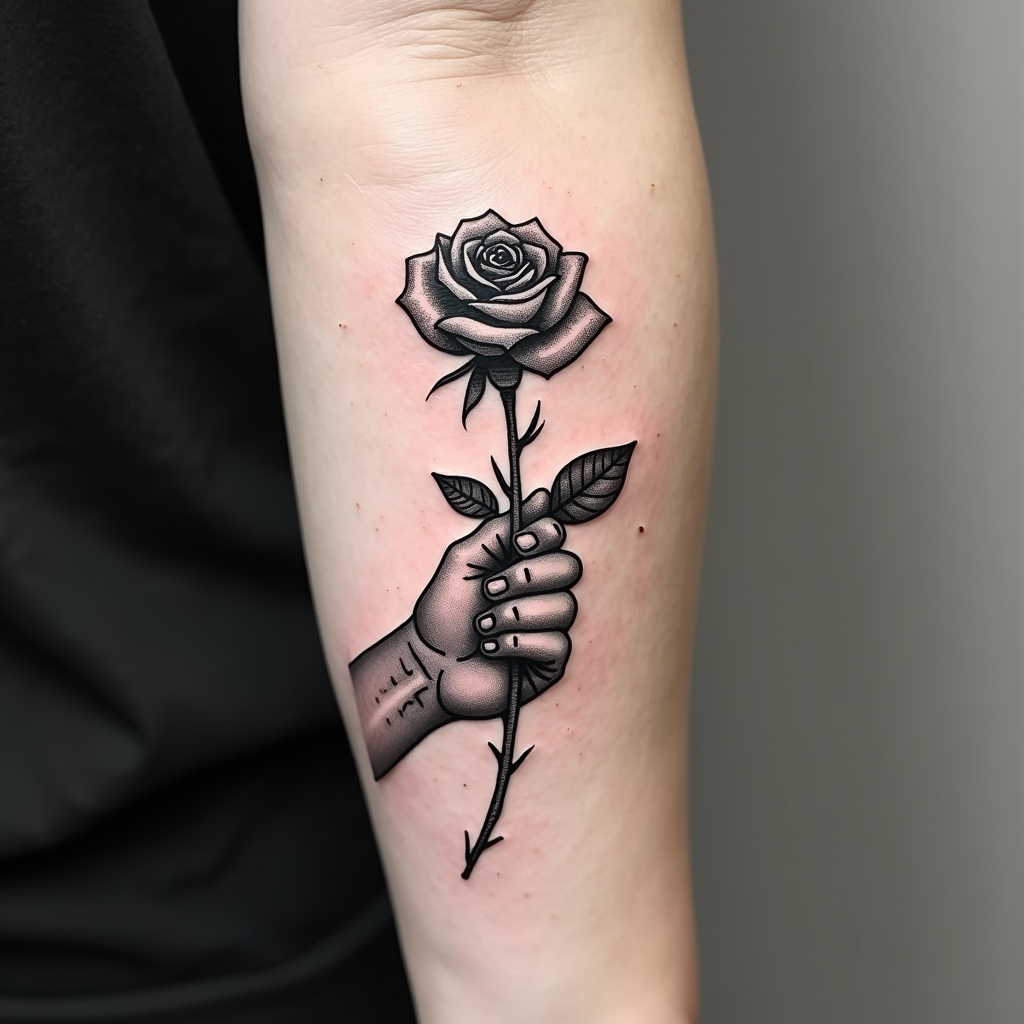

In [67]:
display(image)

In [68]:
image.save("roseblackwork.png")